## Analyzing Used Car Market in Sweden

The project analyzes data scraped from one of Europe's most popular used car listing sites[AutoUncle](https://www.autouncle.se/) and build an ML model that can predict used car prices based on a number of features thereby identifying undervalued or overvalued vehicles in Sweden automobile market.

The data used in the project is collected by webscraping [Autouncle](https://www.autouncle.se/).

### Goal

1. Data Acquisition: Collect real-world automobile market data from online sources, leveraging web scraping or available listings, to create a comprehensive dataset of vehicle information.

2. Data Cleaning and Preparation: Process and filter the collected dataset to ensure accuracy and consistency. This includes handling missing values, correcting misaligned data, and standardizing features, making the dataset ready for in-depth analysis and modeling.

3. Machine Learning Model for Price Valuation: Develop a robust machine learning model to estimate automobile prices. The model will use key features such as Mileage, Year, Brand, Model, Transmission, and Fuel Type to predict prices with practical accuracy. The aim is to create a tool that is useful and reliable for price evaluation in real-world scenarios.

4. Market Insights: Analyze the cleaned data and model predictions to uncover meaningful insights about the used car market in Sweden. These insights will support informed decision-making, particularly when purchasing vehicles.

5. Actionable Recommendations: Utilize the model and insights to identify undervalued or overvalued vehicles. This will provide actionable opportunities for both buyers and sellers, helping buyers find good deals and sellers optimize their pricing strategies.



### Workflow

1. Data collection : acquire data by webscraping Europe's largest used car site 'autouncle.se'.

2. Data Cleaning : clean, create new features , and transform the scraped dataset  in to an analysis ready format.
    
3. Explore and visualize the data to uncover patterns and anomalies.

4. Build predictive models using machine learning algorithms.

5. Insights and Recommendations

## 1. Data Collection

The webscraping part of this project is found in another file.

### Import Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# removes warnings
import warnings
warnings.filterwarnings('ignore')

#suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.2f}'.format

### Dataset

In [4]:
cars=pd.read_csv('cars.csv')

In [4]:
cars.shape

(3275, 8)

## 2. Data Cleaning

The data is still very messy. The following will be done step by step
- Check where Model_Year (Year,or Month year format) is missing in any of the rows. If it is missing, the delete the rows. 
- There were issues with rows where the column values were misaligned. This was particularly observed in the Model_Year column where values were supposed to be date/year but rather assigned values such as '1 / 1', '1 / 2','1 / 3'. In such cases we shift values to the previous column.
- Other missalignment issue with the gearbox column 
- drop all rows where the gearbox column is not either 'Automatic' or 'Manual'
- drop the 'Gearbox2' column
- create a new column 'Brand' from the 'Name' column which is just the brand name
- create a new column 'Model' from the name column
- create a new column from the location column consisting only the city name
- remove 'kr' from the price column and change it to an int column
- clean the Model_Year column and extract only the year
- combine the 'Brand' and 'Model' in order to see which car models are popular
- drop unnecessary columns
- remove rows where mileage column values are Electric should be mileage value
- strip mil from mileage column and change it to an integer value
- change datatype

##### Step 1. Check Model_Year

Check where Model_Year (Year,or Month year format) is missing in any of the rows. If it is missing, the delete the rows.

In [5]:
cars=cars[~cars['Model_Year'].str.contains('mil')]
#cars.head()

##### Step 2. Missalignment and Wrongly assigned values

There were issues with rows where the column values were misaligned. This was particularly observed in the Model_Year column where values were supposed to be date/year but rather assigned values such as '1 / 1', '1 / 2','1 / 3'. In such cases we shift values to the previous column.

In order to do that a function is created that checks for rows where Model_Year contains '/'.


In [6]:
# Define a function to fix rows where Model_Year consists of '/'
def fix_row(row):
    if '/' in str(row['Model_Year']):
        row['Model_Year'] = row['Mileage']  # Assign 'Mileage' to 'Model_Year'
        row['Mileage'] = row['Fuel_Type']  # Assign 'Fuel_Type' to 'Mileage'
        row['Fuel_Type'] = row['Gearbox']  # Assign 'Gearbox' to 'Fuel_Type'
        row['Gearbox'] = row['Gearbox2']  # Assign 'Gearbox2' to 'Gearbox'
        row['Gearbox2'] = None  # Clear 'Gearbox2' as it is no longer needed
    return row

# Apply the fix_row function selectively
cars = cars.apply(fix_row, axis=1)

#### Step 3. Gearbox column Missalignment

In [9]:
cars.head(2)

,Name,Price,Location,Model_Year,Mileage,Fuel_Type,Gearbox,Gearbox2
0,MG ZS EV LHD 45KWH LUXURY MY21,149900kr,"212 37 Malmö, Skåne",2020,1950 mil,Electric,≈ 263 km,Automatic
1,MG ZS EV 45KWH LUXURY *0% Räntekampanj,149900kr,"212 37 Malmö, Skåne",2021,4354 mil,Electric,≈ 263 km,Automatic


As we can see above, there is still some missalignment issues with the 'Gearbox' column. It was wrongly assigned in the column next to it.

In order to do that a function is created that checks if a row is wrongly misaligned, and if it is, a value from the next column is assigned.

In [7]:
def fix_gear(row):
    if 'km' in str(row['Gearbox']):
        row['Gearbox'] = row['Gearbox2']  # Assign 'Gearbox2' to 'Gearbox'
        row['Gearbox2'] = None  # Clear 'Gearbox2' as it is no longer needed
    return row
cars=cars.apply(fix_gear,axis=1)

#### Step 4. Drop rows where Gearbox is not either 'Automatic' or 'Manual'

In [8]:
cars['Gearbox'].value_counts()

Gearbox
Automatic          2258
Manual              530
170 HP (125 kW)      24
313 HP (230 kW)      10
136 HP (100 kW)       9
                   ... 
237 HP (174 kW)       1
331 HP (243 kW)       1
333 HP (244 kW)       1
262 71, Skåne         1
207 HP (152 kW)       1
Name: count, Length: 105, dtype: int64

In [9]:
len(cars[~cars['Gearbox'].isin(['Automatic','Manual'])])

299

There were 299 rows where The transmission values were neither 'Automatic' or 'Manual'. These observations will be deleted from the dataset.

In [10]:
cars = cars[cars['Gearbox'].isin(['Manual','Automatic'])]

#### Step 5. Drop Gearbox2 as it is no longer needed

In [11]:
cars = cars.drop('Gearbox2',axis=1)
cars.columns

Index(['Name', 'Price', 'Location', 'Model_Year', 'Mileage', 'Fuel_Type',
       'Gearbox'],
      dtype='object')

#### Step 5. Check Mileage

There were some rows where the Mileage values were assigned 'Electric'. Drop these rows and reset index.

In [16]:
len(cars[cars['Mileage']=='Electric'])

59

In [12]:
cars=cars[cars['Mileage']!='Electric'].reset_index(drop=True)

#### Step 6. Check Missing values 

In [13]:
cars.isnull().sum()

Name          0
Price         0
Location      0
Model_Year    0
Mileage       0
Fuel_Type     0
Gearbox       0
dtype: int64

#### Step 7. Change Datatype 

In order to do that, 'kr' and ' mil' needs to be stripped from the 'Price' and 'Mileage' columns respectively.

In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729 entries, 0 to 2728
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        2729 non-null   object
 1   Price       2729 non-null   object
 2   Location    2729 non-null   object
 3   Model_Year  2729 non-null   object
 4   Mileage     2729 non-null   object
 5   Fuel_Type   2729 non-null   object
 6   Gearbox     2729 non-null   object
dtypes: object(7)
memory usage: 149.4+ KB


In [14]:
cars['Price']=cars['Price'].replace('kr','',regex= True).astype(int)
cars['Mileage'] = cars['Mileage'].str.replace(r'\D', '', regex=True).astype(int)
cars['Year'] = cars['Model_Year'].str.extract(r'(\b\d{4}\b)').astype(int)
cars.head()

,Name,Price,Location,Model_Year,Mileage,Fuel_Type,Gearbox,Year
0,MG ZS EV LHD 45KWH LUXURY MY21,149900,"212 37 Malmö, Skåne",2020,1950,Electric,Automatic,2020
1,MG ZS EV 45KWH LUXURY *0% Räntekampanj,149900,"212 37 Malmö, Skåne",2021,4354,Electric,Automatic,2021
2,MG ZS EV 45KWH LUXURY *0% Räntekampanj,149900,"212 37 Malmö, Skåne",2021,2720,Electric,Automatic,2021
3,MG ZS EV 45kwh LUXUARY,149900,"212 37 Malmö, Skåne",2021,6833,Electric,Automatic,2021
4,Kia e-Niro ADVANCE 204 Hk 64 kWh Privatleasing...,259900,"141 74 Segeltorp, Stockholm",2021,4057,Electric,Automatic,2021


##### Rename Gearbox column to Transmission

In [15]:
cars.rename(columns={'Gearbox':'Transmission'},inplace= True)

## Feature Engineering

- create new column such as brand, model from name
- create new column car age,
- create a new column from the location column consisting only the county name
- create a new column called Price_per_Mile  to get insights into the value proposition of a car based on its cost and how much it has been driven.

##### Car_Age

In [16]:
from datetime import datetime

current_year = datetime.now().year
cars['Car_Age'] = current_year - pd.to_numeric(cars['Year'], errors='coerce')

##### Price_per_Mile

Lower Price per Mileage indicates Better Value for Money(Usually). 
Higher Price per Mileage indicates a Premium Car or Newer Condition.

In [17]:
cars['Price_per_Mile'] =cars['Price'] / cars['Mileage']

##### Brand,  Brand_Model

In [18]:
cars['Brand']=cars['Name'].str.split(' ').str[0]

In [19]:
cars['Brand_Model'] = cars['Name'].str.split().str[:2].str.join(' ')

##### County

The location column has some information that needs to be updated in order to extract a County column.

The following function creates a function to extract the county from the location column

In [20]:
# Define a function to extract the city name
def extract_city(location):
    if 'Delivered to you' in location:
        return None  # Mark rows with 'Delivered to you' for deletion
    elif ',' in location:
        return location.split(',')[1].strip()  # Extract county after comma
    else:
        return location.strip()  # If no comma, return the full location as county

# Apply the function to the Location column
cars['County'] = cars['Location'].apply(extract_city)

# Drop rows where County is None
cars = cars.dropna(subset=['County'])


In [21]:
cars=cars.reset_index(drop=True)

Retain only the observations in the County column where the count of occurrences is more than 2.

In [22]:
# Remove counties with 1 or 2 observations in the dataset.
county_counts = cars['County'].value_counts()
counties_to_keep = county_counts[county_counts > 2].index

# Keep only rows where the County column is in the list of counties to keep
cars = cars[cars['County'].isin(counties_to_keep)]

In [23]:
cars=cars.reset_index(drop=True)

##### Fuel_Type

categorize the Fuel_Type column into the specified six groups 

In [24]:
def categorize_fuel_type(fuel_type):
    if 'Electric' in fuel_type and '/' not in fuel_type:
        return 'Electric'
    elif 'Hybrid' in fuel_type or 'Electric/' in fuel_type:
        return 'Hybrid'
    elif 'Petrol' in fuel_type and 'Electric/' not in fuel_type:
        return 'Petrol'
    elif 'Diesel' in fuel_type and 'Electric/' not in fuel_type:
        return 'Diesel'
    elif 'Natural gas' in fuel_type:
        return 'Natural Gas'
    else:
        return 'Ethanol'
    

# Apply the categorization to the Fuel_Type column
cars['Fuel'] = cars['Fuel_Type'].apply(categorize_fuel_type)

print(cars['Fuel'].value_counts())

Fuel
Petrol         871
Diesel         784
Electric       536
Hybrid         445
Ethanol         10
Natural Gas      4
Name: count, dtype: int64


## 3.Exploratory Data Analysis (EDA)

##### Price
Distribution of Price of cars

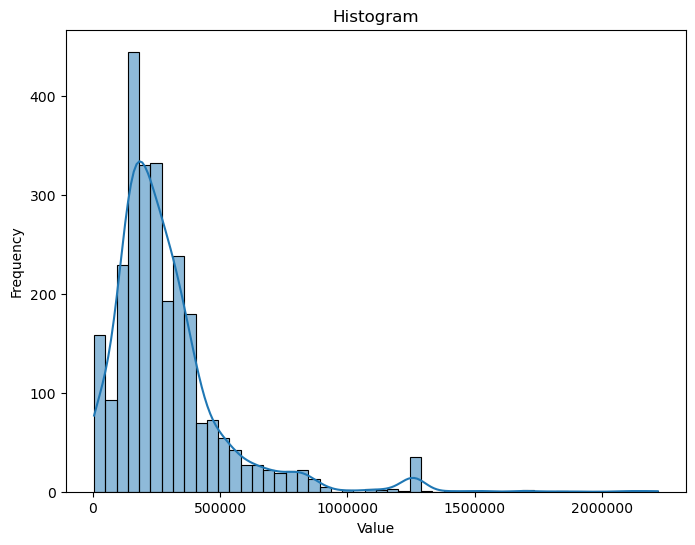

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(cars['Price'], bins=50, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.ticklabel_format(style='plain')
plt.show()

##### Brand, Model, Brand_Model
Which car brands and models are most available in Sweden?

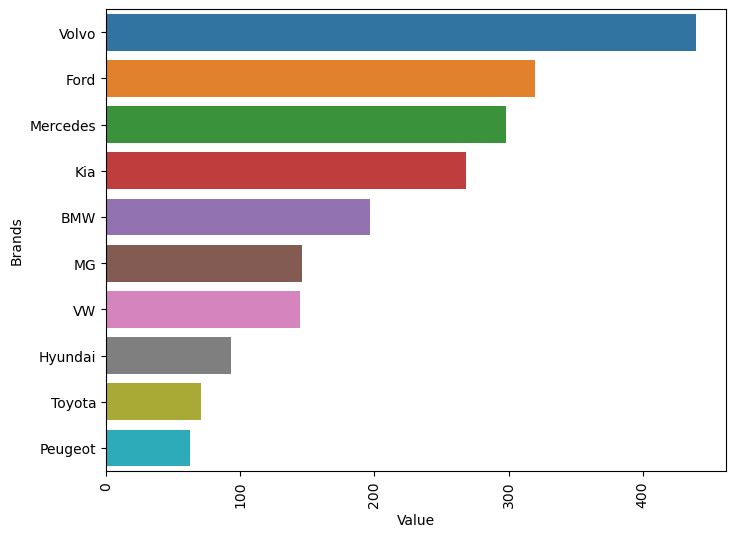

In [261]:
var = cars['Brand']

var_value_counts = var.value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=var_value_counts, y=var_value_counts.index)
plt.xlabel('Value')
plt.ylabel('Brands')
plt.xticks(rotation=90)
plt.show()

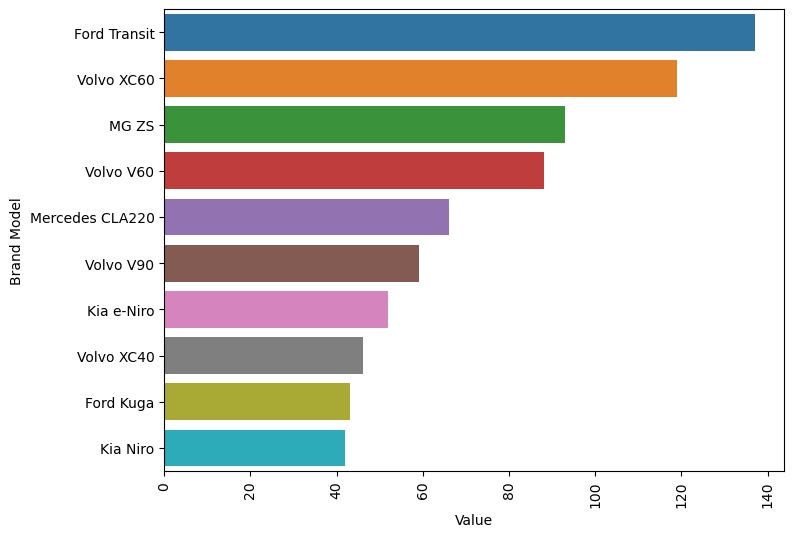

In [262]:
var = cars['Brand_Model']
var_value_counts = var.value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=var_value_counts, y=var_value_counts.index)
plt.xlabel('Value')
plt.ylabel('Brand Model')
plt.xticks(rotation=90)
plt.show()

As expected, The brand which is sold the most in Sweden is Volvo followed by Mercedes.

Volvo has 4 different models in the 10 most popular model category.

##### Relationship between Mileage and Price

In [40]:
correlation = cars['Mileage'].corr(cars['Price'])

print('Correlation Mileage and Price:', correlation)

Correlation Mileage and Price: -0.48520882696296985


<Figure size 1600x1200 with 0 Axes>

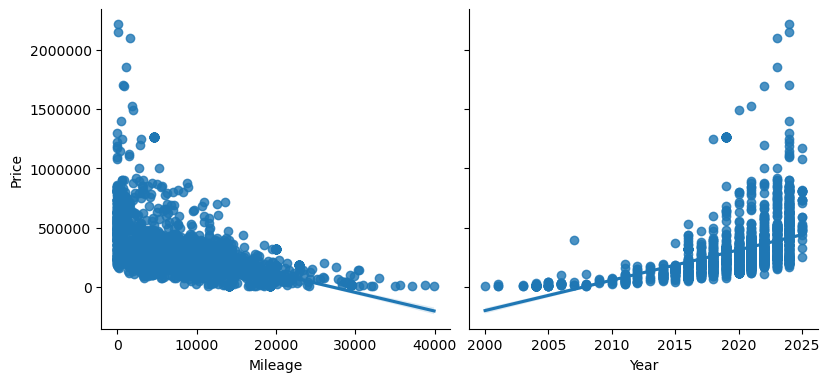

In [41]:
plt.figure(figsize=(16,12))
sns.pairplot(cars, 
             x_vars=['Mileage', 'Year'],
             y_vars='Price',
             diag_kind='hist',
             kind='reg',
             height = 4
             )

plt.ticklabel_format(style='plain')
plt.show()

As the mileage increases, the price of a car decreases. In other words cars with high mileage numbers are sold cheaper on the market.

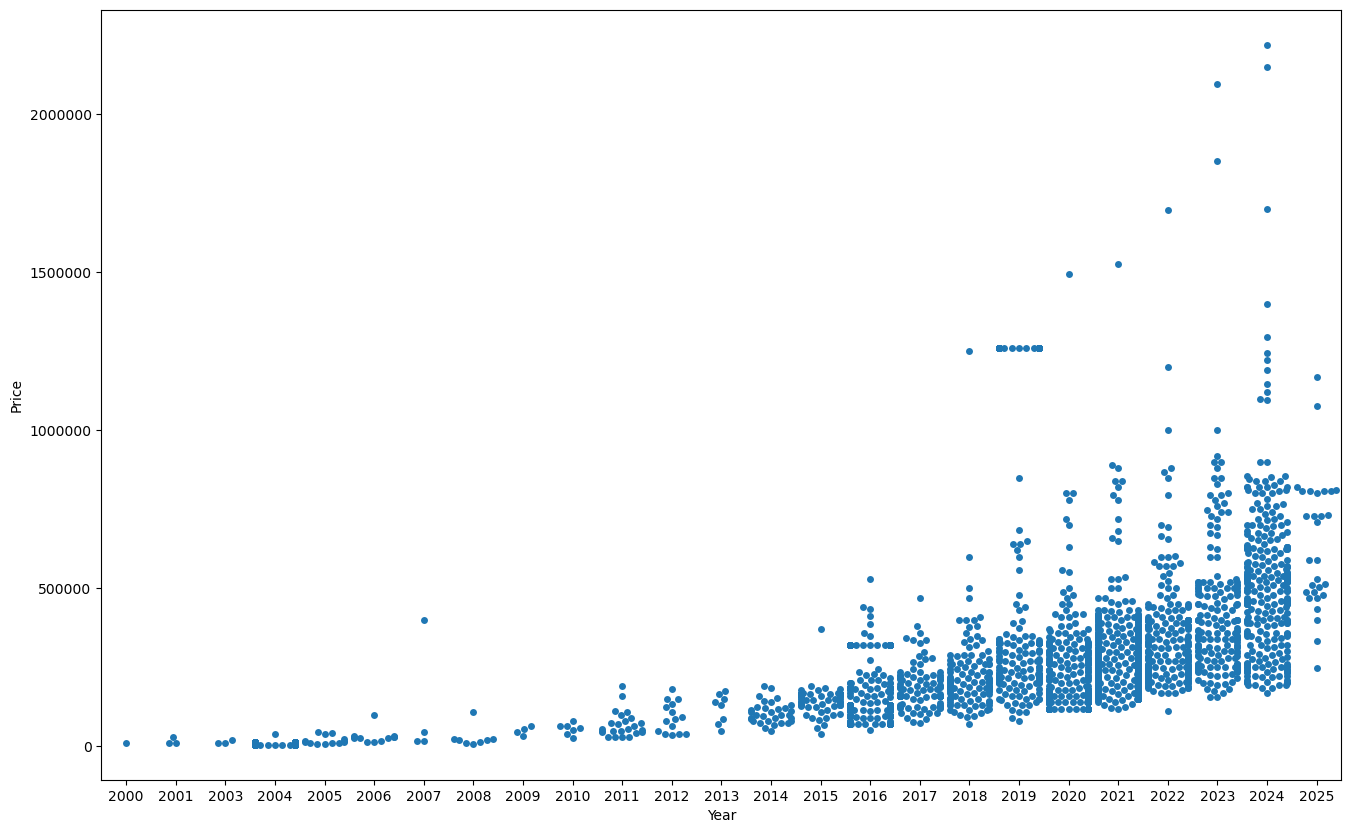

In [400]:
plt.figure(figsize = (16,10))
plt.ticklabel_format(style='plain')
sns.swarmplot(x = 'Year',y = 'Price',data = cars)
plt.show()

As expected cars with recent make years on average are more expensive.

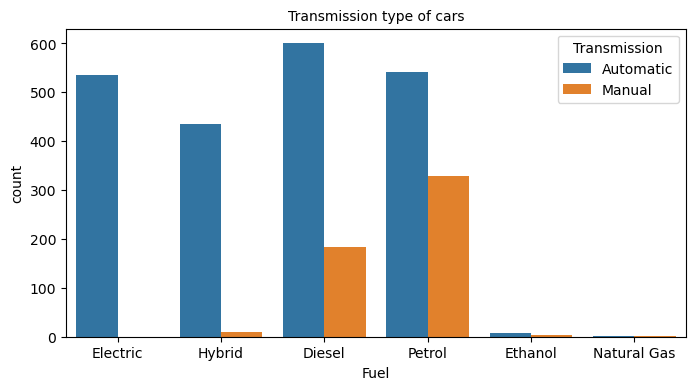

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(x='Fuel',data=cars,hue='Transmission')
plt.title('Transmission type of cars',size=10)
plt.show()

Most cars on the market are 'Automatic'.

In [37]:
cars.groupby('Fuel')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Fuel,,,,,,,,
Diesel,784.00,229198.04,127940.52,5000.00,150000.00,208600.00,309000.00,879000.00
Electric,536.00,346204.78,198125.86,77100.00,199800.00,279900.00,445625.00,1295000.00
Ethanol,10.00,301810.00,84606.49,189900.00,223650.00,317400.00,379675.00,399900.00
Hybrid,445.00,397091.31,229750.09,64900.00,249800.00,339900.00,479900.00,2149900.00
Natural Gas,4.00,289943.75,256557.91,33500.00,87050.00,306950.00,509843.75,512375.00
Petrol,871.00,250657.56,284011.07,6900.00,113900.00,186800.00,289900.00,2219000.00


Cars with diesel fuel type are relatively cheaper in price, while Hybrid and Electric vehicles are more expensive than other fuel groups in the market.

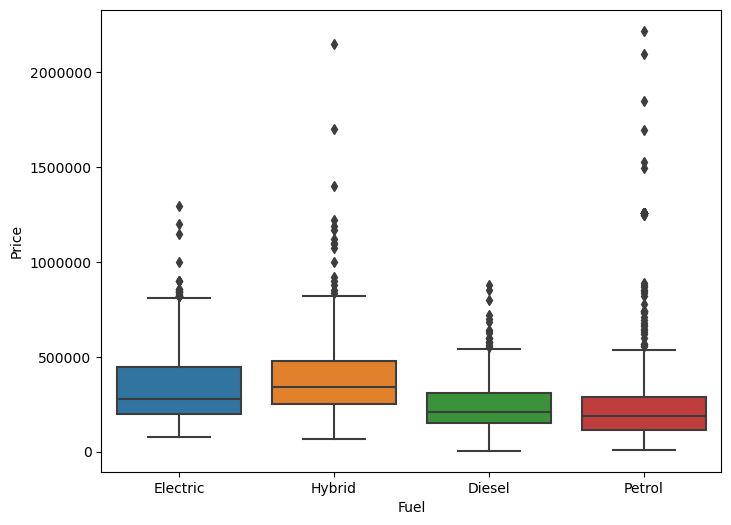

In [32]:
#remove Ethanol(10), and Natural Gas(4) from this specific plot as these cars are very few in numbers
data=cars[cars['Fuel'].isin(['Diesel','Petrol','Electric','Hybrid'])]
plt.figure(figsize=(8,6))
plt.ticklabel_format(style='plain')
sns.boxplot(x='Fuel',y='Price',data=data)
plt.show()

##### Prices in Different Counties

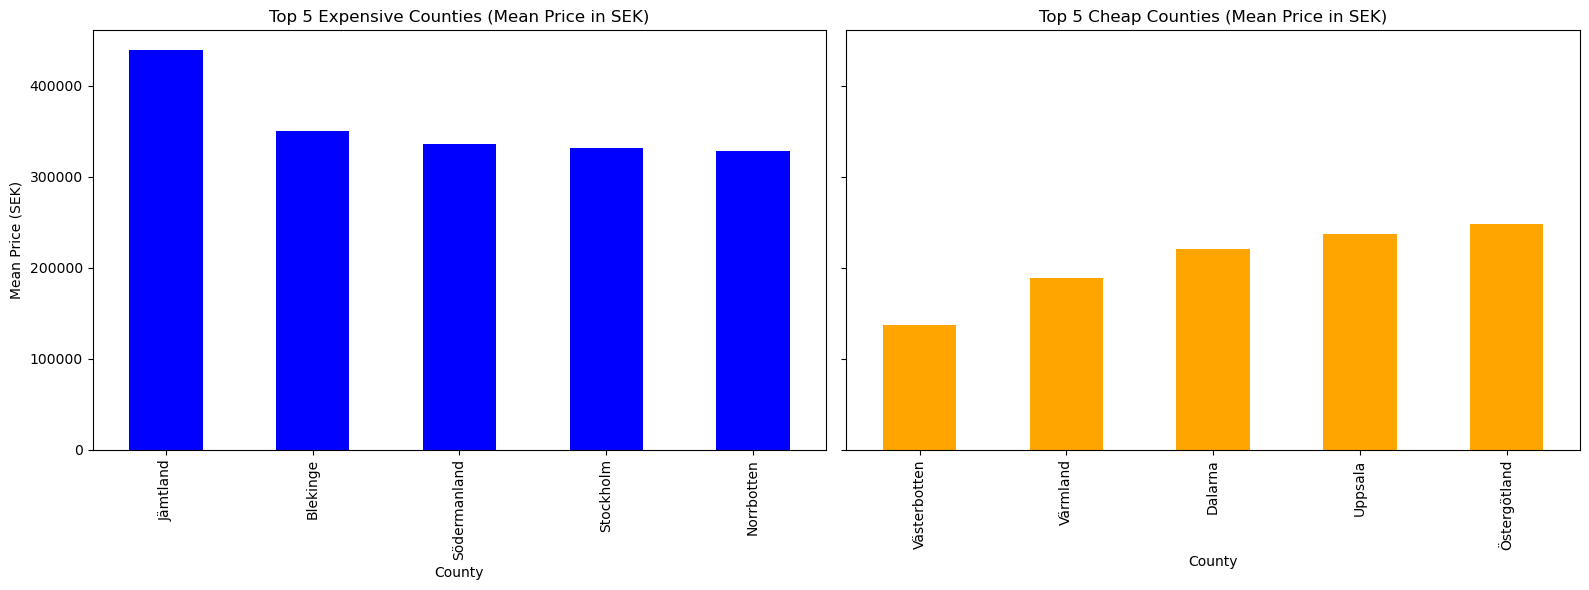

In [33]:
# Calculate the mean prices for expensive and cheap counties
expensive_counties = cars.groupby(['County'])['Price'].mean().sort_values(ascending=False).head()
cheap_counties = cars.groupby(['County'])['Price'].mean().sort_values().head()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot the expensive counties
expensive_counties.plot(
    ax=axes[0],
    kind='bar',
    color='blue',
    title='Top 5 Expensive Counties (Mean Price in SEK)'
)
axes[0].set_ylabel('Mean Price (SEK)')

# Plot the cheap counties
cheap_counties.plot(
    ax=axes[1],
    kind='bar',
    color='orange',
    title='Top 5 Cheap Counties (Mean Price in SEK)'
)

plt.tight_layout()
plt.show()


It is much cheaper to buy cars in Västerbotten,Värmland, Dalarna and Uppsala counties than anywhere else in Sweden.

Budget-conscious buyers should look closely for cars in these places.

Average Prices of cars in Jämtland, Blekinge, Södermanland, and Stockholm counties are more expensive than other counties. 

##### Brands and Prices of Cars

Which car brands have the highest and lowest average prices in Sweden?

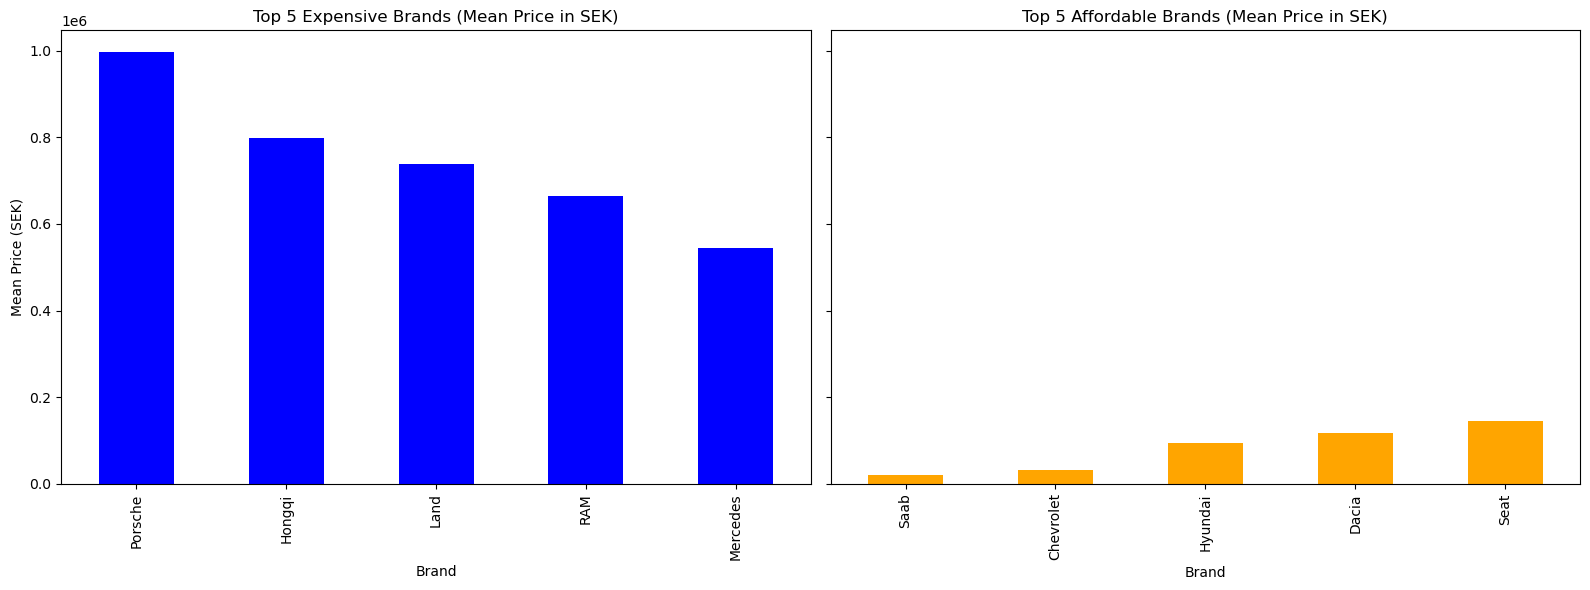

In [40]:
# Calculate the mean prices for expensive and cheap car brands
steep_brand = cars.groupby(['Brand'])['Price'].mean().sort_values(ascending=False).head()
affordable_brand = cars.groupby(['Brand'])['Price'].mean().sort_values().head()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot the expensive brands
steep_brand.plot(
    ax=axes[0],
    kind='bar',
    color='blue',
    title='Top 5 Expensive Brands (Mean Price in SEK)'
)
axes[0].set_ylabel('Mean Price (SEK)')

# Plot the affordable brands
affordable_brand.plot(
    ax=axes[1],
    kind='bar',
    color='orange',
    title='Top 5 Affordable Brands (Mean Price in SEK)'
)

plt.tight_layout()
plt.show()

## 4. Data Pre-Processing and Modeling

Next steps
- select important features
- convert categorical columns to numeric using one-hot encoding
- standardize the data using StandardScaler
- build ML models that can predict price of a car 
- compare model performances

##### Select Features for ML

The following columns will be selected for ML model.

In [34]:
column_list = ['Brand', 'Mileage', 'Fuel',
       'Transmission', 'Year', 'County',
       'Price_per_Mile','Price']
cars.to_csv('cars_ml.csv',columns= column_list,index=False)

In [26]:
df=pd.read_csv('cars_ml.csv')

In [27]:
##df= cars[['Brand', 'Mileage', 'Fuel','Transmission', 'Year', 'County','Price_per_Mile','Price']]

##### Convert Categorical Data

Most machine learning algorithms require numerical inputs to make predictions. 

Some of these features have categorical formats and need to be converted in to numeric.
Brand, Fuel, and Transmission will be converted to numeric format. the technique chosen is One-hot encoding  as the columns are nominal (has no natural order).

In [28]:
dummies = pd.get_dummies(df[['Brand', 'Fuel', 'Transmission','County']],drop_first=True,dtype='int')
df = df.drop(['Brand', 'Fuel', 'Transmission','County'],axis=1)
df = pd.concat([df,dummies],axis=1)
df.shape

(2650, 72)

##### Train Test Split

Split the dataset into training and testing sets using train_test_split.

In [29]:
X = df.drop('Price',axis=1)
y = df['Price']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

#####  Feature Scaling

Normalize or standardize features to ensure they are on a comparable scale.

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [36]:
X_train.shape

(2120, 71)

### Model Comparison

#### Model Training

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=101),
    "Decision Tree": DecisionTreeRegressor(random_state=101),
    "Support Vector Regressor": SVR()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[name] = {"RMSE": rmse, "R2 Score": r2}

# Display the results
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']:.2f}, R2 Score = {metrics['R2 Score']:.2f}")


Model Performance:
Linear Regression: RMSE = 148341.80, R2 Score = 0.58
Random Forest: RMSE = 56759.33, R2 Score = 0.94
Decision Tree: RMSE = 72359.01, R2 Score = 0.90
Support Vector Regressor: RMSE = 235542.82, R2 Score = -0.06


In [38]:
best_model_name = min(results, key=lambda x: (results[x]['RMSE'], -results[x]['R2 Score']))
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Best Model: Random Forest


##### Hyperparameter Tuning
Fine-tune the Random Forest model to achieve better performance using GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=101), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


#### Feature Importance

Identify which features contribute the most to predictions:

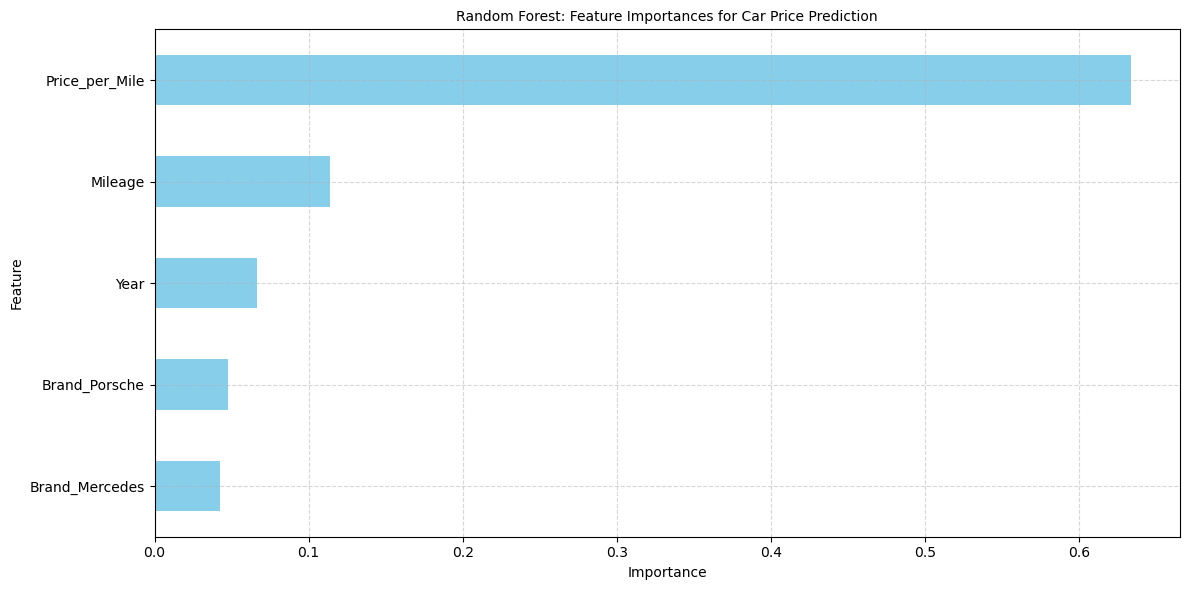

In [40]:
# Create a Pandas Series to store feature importances from the model
feature_rank=pd.Series(grid_search.best_estimator_.feature_importances_,index=X_train.columns,name='Importance').sort_values(ascending=True,inplace=False)[-5:]

# Plotting a horizontal bar chart to visualize feature importances
ax=feature_rank.plot(kind='barh',figsize=(12,6), color='skyblue')

# Setting x-axis and y-axis labels, and the title for the plot 
plt.xlabel("Importance", fontsize=10)
plt.ylabel("Feature", fontsize=10)
plt.title("Random Forest: Feature Importances for Car Price Prediction", fontsize=10)

#add line grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show();



Price per mile driven, Mileage and The make year were the most important features in predicting the value of a car.

#### Save the Model
save the trained model for future use.

In [52]:
import joblib

joblib.dump(grid_search, 'random_forest_model.pkl')


['random_forest_model.pkl']

## 5. Insights and Recommendations

The Random Forest model saved will be used to identify undervalued cars. 

It is done by comparing predicted prices to actual prices and flagging those with a significant gap. 

In [53]:
# Load the saved model
import joblib
loaded_model = joblib.load('random_forest_model.pkl')

In [54]:
# Predict prices using the test set
predictions=loaded_model.predict(X_test)


##### Set a threshold to identify undervalued cars

In [125]:
# Create a DataFrame with actual, predicted, and price difference
undervalued_df = pd.DataFrame({
    'Actual': y_test,
    'Predictions': predictions
})

# Calculate the price difference
undervalued_df['Price_Difference'] = undervalued_df['Predictions'] - undervalued_df['Actual']

# Identify undervalued cars with a threshold of 10%, select those cars with a price difference that is higher than 10% of the the car's true price.
threshold = 0.1
undervalued_mask = undervalued_df['Price_Difference'] > (threshold * undervalued_df['Actual'])

# Filter undervalued cars early
undervalued_df = undervalued_df[undervalued_mask]

# Add 'Brand' and 'Brand_Model' details from the original dataset so that we can see which Brand and Model
undervalued_with_details = undervalued_df.join(cars[['Brand', 'Brand_Model']], how='left')
undervalued_with_details


,Actual,Predictions,Price_Difference,Brand,Brand_Model
1158,239900,278820.50,38920.50,Ford,Ford Transit
1615,89900,111073.13,21173.13,Renault,Renault Zoe
1157,204900,465597.58,260697.58,Renault,Renault Clio
1784,18000,24086.68,6086.68,Opel,Opel Corsa
1754,298900,342224.34,43324.34,Lexus,Lexus UX
1281,149900,166114.71,16214.71,Toyota,Toyota C-HR
555,99900,144147.77,44247.77,Renault,Renault Zoe
1760,8500,11067.62,2567.62,Toyota,Toyota Avensis
56,149900,170930.89,21030.89,Ford,Ford Focus
643,919000,1079429.79,160429.79,Porsche,Porsche Cayenne


According to the random forest model, the 32 listed above are the most undervalued cars in the dataset,that are priced significantly below their predicted value, signaling potential bargains.

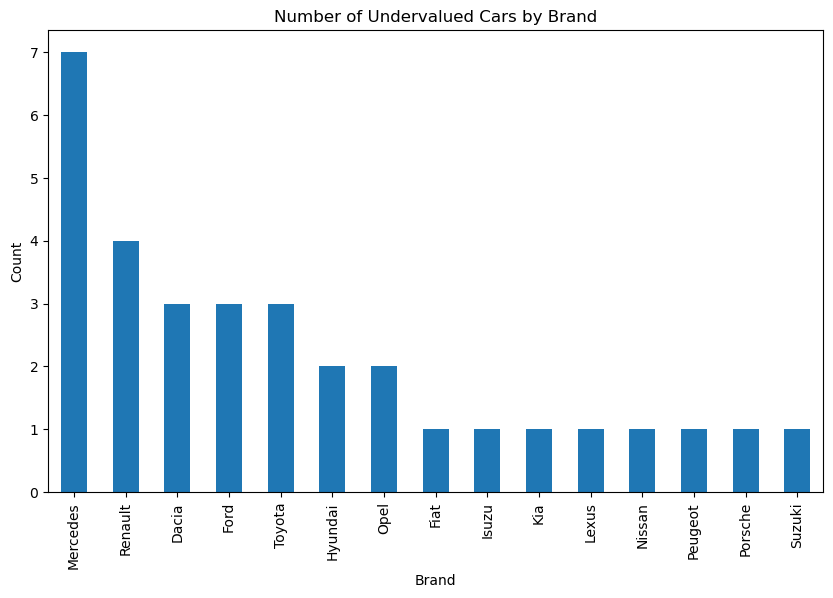

In [138]:
# Plot undervalued cars by brand
undervalued_with_details.groupby('Brand').size().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Number of Undervalued Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


The random forest model not only predicts the prices of used cars but also provides actionable insights for identifying potential opportunities in the market for both sellers as well as buyers.

For Buyers it highlights cars that are priced significantly below their predicted value, signaling potential bargains.
For Sellers the model could be useful by identifying cars that are undervalued compared to market trends so that they could adjust pricing strategies for better profit margins.